In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("Toxic+Comment+Classifier+files/train.csv")

In [4]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


<AxesSubplot:>

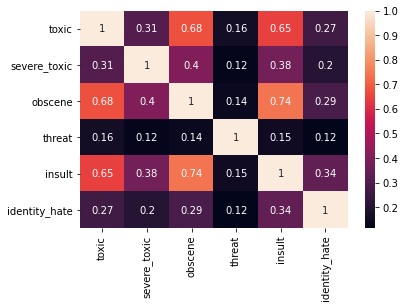

In [5]:
sns.heatmap(data.corr(),annot=True)

In [6]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
data['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [10]:
data['severe_toxic'].value_counts() 

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [11]:
data['obscene'].value_counts()  

0    151122
1      8449
Name: obscene, dtype: int64

In [12]:
data['threat'].value_counts()  

0    159093
1       478
Name: threat, dtype: int64

In [13]:
data['insult'].value_counts()  

0    151694
1      7877
Name: insult, dtype: int64

In [14]:
data['identity_hate'].value_counts()  

0    158166
1      1405
Name: identity_hate, dtype: int64

In [15]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

toxic


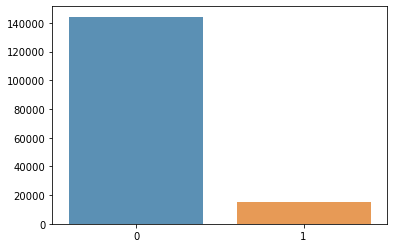

severe_toxic


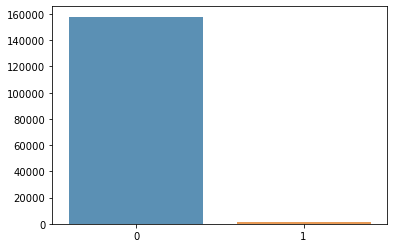

obscene


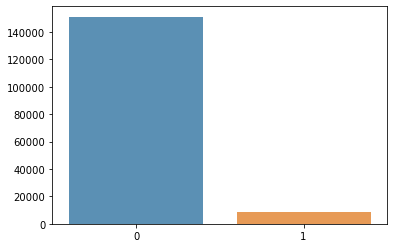

threat


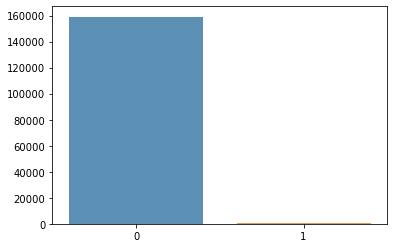

insult


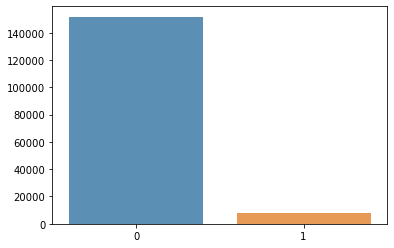

identity_hate


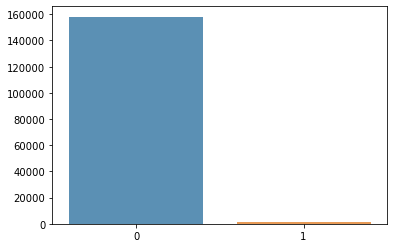

In [16]:
for i in data.columns[2:]:
    print(i)
    c=data[i].value_counts() 
    sns.barplot(c.index, c.values, alpha=0.8)
    plt.show()
    

In [17]:
sentencetype_graph=data.iloc[:,2:].sum()  

In [18]:
sentencetype_graph

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

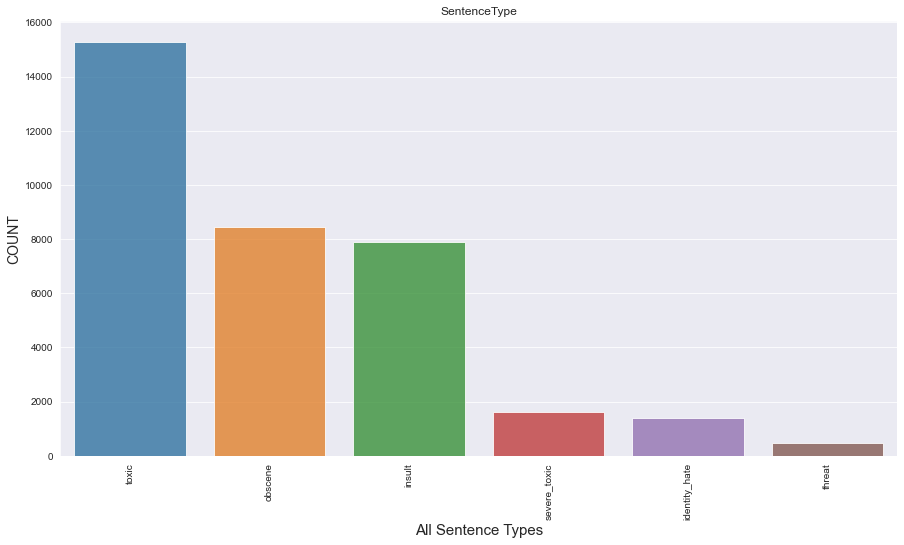

In [19]:
sns.set_style("darkgrid")
ls=sentencetype_graph.sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8) 
plt.title('SentenceType')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('All Sentence Types', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

In [20]:
data['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [21]:
data['length']= data['comment_text'].apply(len)

In [22]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


<AxesSubplot:ylabel='Frequency'>

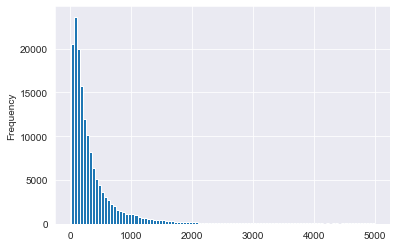

In [23]:
data['length'].plot.hist(bins=100)

toxic


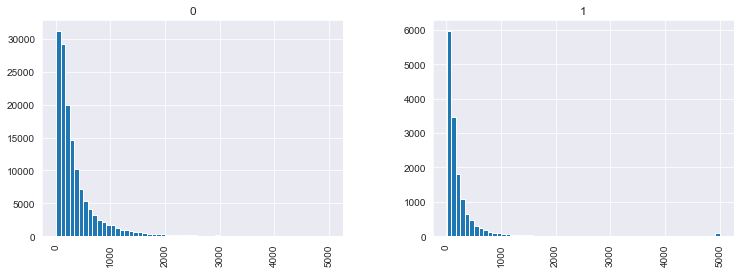

severe_toxic


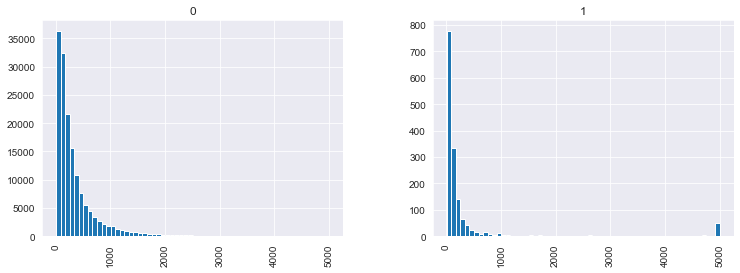

obscene


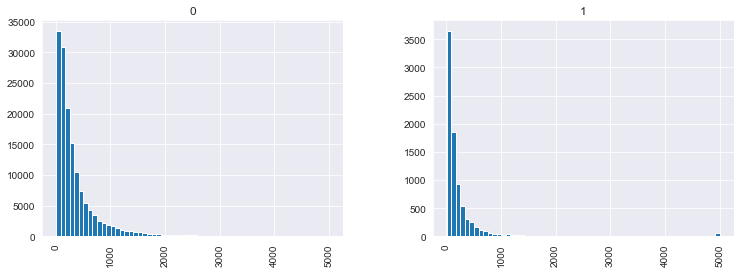

threat


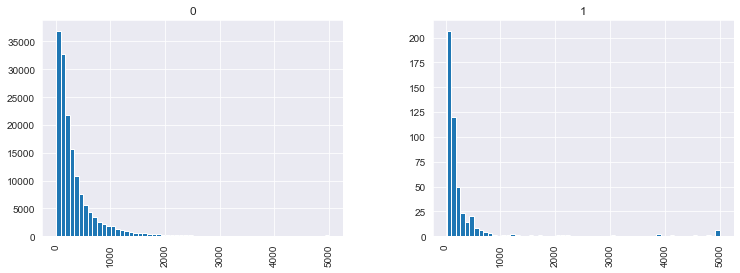

insult


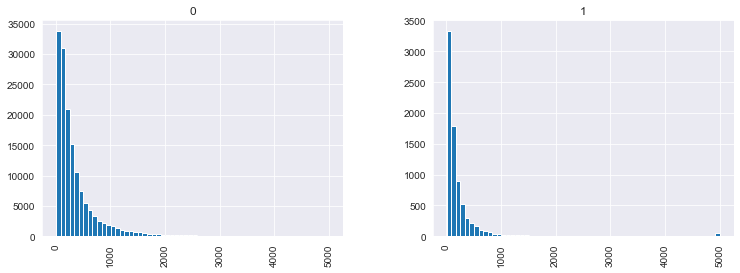

identity_hate


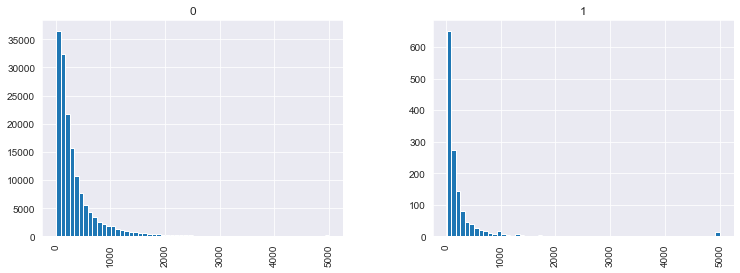

In [24]:
for i in data.columns[2:8]:
    print(i) 
    data.hist(column='length',by=i,bins=60,figsize=(12,4))
    plt.show()
    

In [25]:
import re
import string

In [26]:
remove_numeric = lambda x: re.sub('\w*\d\w*', ' ', x)
all_lower_case = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_line = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

In [27]:
data['comment_text'] = data['comment_text'].map(remove_numeric).map(all_lower_case).map(remove_line).map(remove_non_ascii)

In [28]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0,622
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0,0,0,0,0,0,295
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0,0,0,0,0,0,81
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [29]:
len(data['comment_text'][1])

106

In [30]:
len(data['comment_text'][0])

259

In [31]:
data['New_length']= data['comment_text'].apply(len)

In [32]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,New_length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264,259
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,112,106
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,233,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0,622,622
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,67,67
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0,0,0,0,0,0,295,295
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0,99,94
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0,0,0,0,0,0,81,81
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,116,116


In [33]:
data['New_length'].sum()

62436863

In [34]:
data['length'].sum()

62882658

In [35]:
Insult_comment_df=data.loc[:,['id','comment_text','insult']]

In [36]:
IdentityHate_comment_df=data.loc[:,['id','comment_text','identity_hate']]

In [37]:
Toxic_comment_df= data.loc[:,['id','comment_text','toxic']]

In [38]:
SevereToxic_comment_df= data.loc[:,['id','comment_text','severe_toxic']]

In [39]:
Obscene_comment_df= data.loc[:,['id','comment_text','obscene']]

In [40]:
Threat_comment_df= data.loc[:,['id','comment_text','threat']]

In [41]:
Threat_comment_df

,id,comment_text,threat
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [42]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [43]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

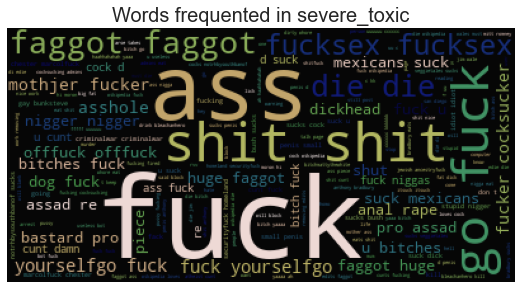

In [44]:
wordcloud(SevereToxic_comment_df,'severe_toxic')

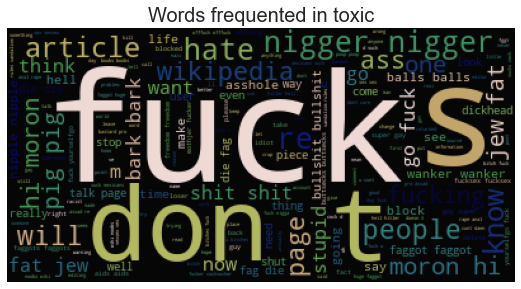

In [45]:
wordcloud(Toxic_comment_df,'toxic')

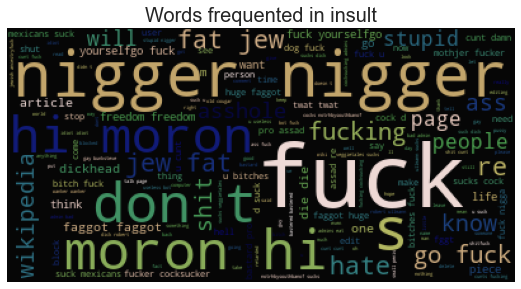

In [46]:
wordcloud(Insult_comment_df,'insult')

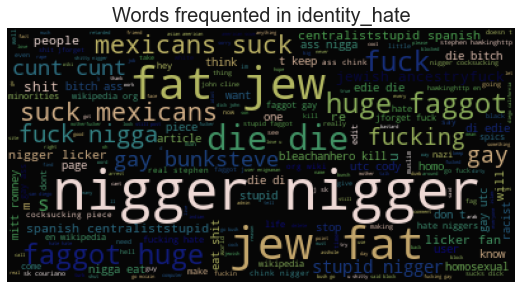

In [47]:
wordcloud(IdentityHate_comment_df,'identity_hate')

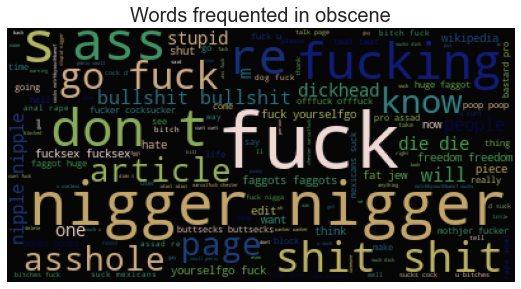

In [48]:
wordcloud(Obscene_comment_df,'obscene')

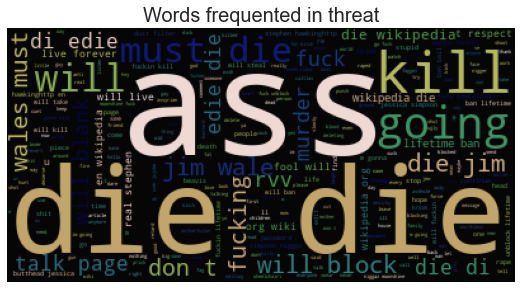

In [49]:
wordcloud(Threat_comment_df,'threat')

In [50]:
##Balancing The comment ----> equal no of comments

In [51]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,New_length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264,259
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,112,106
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,233,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0,622,622
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,67,67
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0,0,0,0,0,0,295,295
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0,99,94
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0,0,0,0,0,0,81,81
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,116,116


In [52]:
Toxic_comment_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [53]:
Toxic_comment_balanced_1 = Toxic_comment_df[Toxic_comment_df['toxic'] == 1].iloc[0:5000,:]
Toxic_comment_balanced_0 = Toxic_comment_df[Toxic_comment_df['toxic'] == 0].iloc[0:5000,:]
print(Toxic_comment_balanced_1.shape)
print(Toxic_comment_balanced_0.shape)
Toxic_comment_balanced=pd.concat([Toxic_comment_balanced_1,Toxic_comment_balanced_0])
print(Toxic_comment_balanced.shape)
Toxic_comment_balanced


(5000, 3)
(5000, 3)
(10000, 3)


,id,comment_text,toxic
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1
...,...,...,...
5544,0ece9249484eddb9,electronic intifada is not an activist site w...,0
5545,0ece971b58a3def7,new genre the new genre supernatural was use...,0
5547,0ecf7cde3391615b,translated as the second vatican council a ...,0
5549,0ed11396420e8531,purpose this rfc will be used to determine com...,0


In [54]:
SevereToxic_comment_df['severe_toxic'].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [55]:
SevereToxic_comment_balanced_1 = SevereToxic_comment_df[SevereToxic_comment_df['severe_toxic'] == 1].iloc[0:1595,:]
SevereToxic_comment_balanced_0 = SevereToxic_comment_df[SevereToxic_comment_df['severe_toxic'] == 0].iloc[0:1595,:]
print(SevereToxic_comment_balanced_1.shape)
print(SevereToxic_comment_balanced_0.shape)
SevereToxic_comment_balanced=pd.concat([SevereToxic_comment_balanced_1,SevereToxic_comment_balanced_0])
print(SevereToxic_comment_balanced.shape)
SevereToxic_comment_balanced

(1595, 3)
(1595, 3)
(3190, 3)


,id,comment_text,severe_toxic
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
55,0020e7119b96eeeb,stupid peace of shit stop deleting my stuff as...,1
181,006e87872c8b370c,you are a stupid fuck and your mother s cunt...,1
442,01208d2b76624130,hi im a fucking bitch,1
579,018663f910e0bfe6,what a motherfucking piece of crap those fuckh...,1
...,...,...,...
1607,044df95de9cc9daa,can you offer advice on how to get the kanji,0
1608,044f008b0f522099,re from coupon to groupon please don t post ...,0
1609,044f39de7fce756e,you have no friends in real life what makes y...,0
1610,044f7f9bbf278968,there are plenty of video game articles tha...,0


In [56]:
Obscene_comment_df['obscene'].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [57]:
Obscene_comment_balanced_1 = Obscene_comment_df[Obscene_comment_df['obscene'] == 1].iloc[0:5000,:]
Obscene_comment_balanced_0 = Obscene_comment_df[Obscene_comment_df['obscene'] == 0].iloc[0:5000,:]
print(Obscene_comment_balanced_1.shape)
print(Obscene_comment_balanced_0.shape)
Obscene_comment_balanced=pd.concat([Obscene_comment_balanced_1,Obscene_comment_balanced_0])
print(Obscene_comment_balanced.shape)
Obscene_comment_balanced

(5000, 3)
(5000, 3)
(10000, 3)


,id,comment_text,obscene
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1
51,001dc38a83d420cf,get fucked up get fuckeeed up got a drink t...,1
55,0020e7119b96eeeb,stupid peace of shit stop deleting my stuff as...,1
...,...,...,...
5274,0e082f20da33edfe,what does copyright mean when we are talking o...,0
5276,0e0938d05dcd9eb9,dysphoria i am afraid that the ip persists i...,0
5277,0e0a25d958600186,redirect talk the lamp film,0
5278,0e0a2b840183541c,yes probably this is why your non notable lin...,0


In [58]:
Threat_comment_df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [59]:
Threat_comment_balanced_1 = Threat_comment_df[Threat_comment_df['threat'] == 1].iloc[0:478,:]
Threat_comment_balanced_0 = Threat_comment_df[Threat_comment_df['threat'] == 0].iloc[0:478,:]
print(Threat_comment_balanced_1.shape)
print(Threat_comment_balanced_0.shape)
Threat_comment_balanced=pd.concat([Threat_comment_balanced_1,Threat_comment_balanced_0])
print(Threat_comment_balanced.shape)
Threat_comment_balanced

(478, 3)
(478, 3)
(956, 3)


,id,comment_text,threat
79,003217c3eb469ba9,hi i am back again last warning stop undoin...,1
176,006b94add72ed61c,i think that your a fagget get a oife and burn...,1
600,0199d6af27b715f3,i m also a sock puppet of this account supri...,1
802,02230885017a50c5,fuck you smith please have me notified when ...,1
1017,02c6e41e4b317ac3,wouldn t be the first time bitch fuck you i l...,1
...,...,...,...
475,01389dc7e054bfe5,hello if you re interested we could re...,0
476,013ad5246f4b953b,f k all rides at worlds of fun i hate all ...,0
477,013bd808a6d3d69b,as to job for you sure thing as soon as i ...,0
478,013c1a43411c5f9a,oh ok i just wanted to see what people though...,0


In [60]:
Insult_comment_df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [61]:
Insult_comment_balanced_1 = Insult_comment_df[Insult_comment_df['insult'] == 1].iloc[0:5000,:]
Insult_comment_balanced_0 = Insult_comment_df[Insult_comment_df['insult'] == 0].iloc[0:5000,:]
print(Insult_comment_balanced_1.shape)
print(Insult_comment_balanced_0.shape)
Insult_comment_balanced=pd.concat([Insult_comment_balanced_1,Insult_comment_balanced_0])
print(Insult_comment_balanced.shape)
Insult_comment_balanced

(5000, 3)
(5000, 3)
(10000, 3)


,id,comment_text,insult
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1
55,0020e7119b96eeeb,stupid peace of shit stop deleting my stuff as...,1
56,0020fd96ed3b8c8b,tony sidaway is obviously a fistfuckee he lo...,1
...,...,...,...
5274,0e082f20da33edfe,what does copyright mean when we are talking o...,0
5276,0e0938d05dcd9eb9,dysphoria i am afraid that the ip persists i...,0
5277,0e0a25d958600186,redirect talk the lamp film,0
5278,0e0a2b840183541c,yes probably this is why your non notable lin...,0


In [62]:
IdentityHate_comment_df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

In [63]:
IdentityHate_comment_balanced_1 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 1].iloc[0:1405,:]
IdentityHate_comment_balanced_0 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 0].iloc[0:1405,:]
print(IdentityHate_comment_balanced_1.shape)
print(IdentityHate_comment_balanced_0.shape)
IdentityHate_comment_balanced=pd.concat([IdentityHate_comment_balanced_1,IdentityHate_comment_balanced_0])
print(IdentityHate_comment_balanced.shape)
IdentityHate_comment_balanced

(1405, 3)
(1405, 3)
(2810, 3)


,id,comment_text,identity_hate
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
105,00472b8e2d38d1ea,a pair of jew hating weiner nazi schmucks,1
176,006b94add72ed61c,i think that your a fagget get a oife and burn...,1
218,008e0818dde894fb,kill all niggers i have hard that others h...,1
238,0097dd5c29bf7a15,u r a tw fuck off u gay boy u r smelly fuck u...,1
...,...,...,...
1414,03ceddddb2903bb0,it s words as of this moment so there s ...,0
1415,03cf942c5f2fac57,intro this is the intro which was on the palp...,0
1416,03d013df0ab0a54b,what businessis your one someone elses page i...,0
1417,03d0179c9762e088,nasib mukhtarov september utc,0


In [64]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams,bigrams,trigrams

In [65]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):

    # Split the data into X and y data sets
    X = dataframe.comment_text
    y = dataframe[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

    # Using vectorizer and removing stopwords
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    # Transforming x-train and x-test
    X_train_cv1 = cv1.fit_transform(X_train) 
    X_test_cv1  = cv1.transform(X_test)      
    
    ## Machine learning models   
    
    ## Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    
    ## k-nearest neighbours
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    ## Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    
    ## Multinomial naive bayes
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    
    ## Support vector machine
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    ## Random Forest 
    randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
    randomforest.fit(X_train_cv1, y_train)
    
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
    ## Saving f1 score results into a dataframe                     
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

In [67]:
severe_toxic_comment_cv = cv_tf_train_test(SevereToxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
severe_toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
severe_toxic_comment_cv

,F1 Score(severe_toxic)
Log Regression,0.940282
KNN,0.860192
BernoulliNB,0.790738
MultinomialNB,0.932377
SVM,0.937901
Random Forest,0.941176


In [68]:
obscene_comment_cv = cv_tf_train_test(Obscene_comment_balanced, 'obscene', TfidfVectorizer, (1,1))
obscene_comment_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
obscene_comment_cv

,F1 Score(obscene)
Log Regression,0.901183
KNN,0.625341
BernoulliNB,0.766640
MultinomialNB,0.887496
SVM,0.915613
Random Forest,0.884261


In [70]:
threat_comment_cv = cv_tf_train_test(Threat_comment_balanced, 'threat', TfidfVectorizer, (1,1))
threat_comment_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
threat_comment_cv

,F1 Score(threat)
Log Regression,0.897338
KNN,0.852459
BernoulliNB,0.745205
MultinomialNB,0.902098
SVM,0.894737
Random Forest,0.923077


In [72]:
insult_comment_cv = cv_tf_train_test(Insult_comment_balanced, 'insult', TfidfVectorizer, (1,1))
insult_comment_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
insult_comment_cv

,F1 Score(insult)
Log Regression,0.901851
KNN,0.320661
BernoulliNB,0.776986
MultinomialNB,0.896299
SVM,0.906218
Random Forest,0.890821


In [73]:
identity_hatecomment_cv = cv_tf_train_test(IdentityHate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identity_hatecomment_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)
identity_hatecomment_cv

,F1 Score(identity_hate)
Log Regression,0.905707
KNN,0.820046
BernoulliNB,0.776699
MultinomialNB,0.903302
SVM,0.896806
Random Forest,0.888087
